In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/financial-news-headlines/guardian_headlines.csv
/kaggle/input/financial-news-headlines/cnbc_headlines.csv
/kaggle/input/financial-news-headlines/reuters_headlines.csv


In [2]:
!pip install nltk
import warnings
# Import all the required libraries 
import nltk
#import stopwords and text processing libraries
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Download NLTK resources (only required once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
cnbc=pd.read_csv('/kaggle/input/financial-news-headlines/cnbc_headlines.csv')
cnbc.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."


In [4]:
guardian=pd.read_csv('/kaggle/input/financial-news-headlines/guardian_headlines.csv')
guardian.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [5]:
reuters=pd.read_csv('/kaggle/input/financial-news-headlines/reuters_headlines.csv')
reuters.head()

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...


In [6]:
cnbc.dropna()
guardian.dropna()
reuters.dropna()

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...
...,...,...,...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...


In [7]:
# Combine DataFrames
df = pd.concat([cnbc, guardian, reuters], ignore_index=True)
df.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."


In [8]:
df.describe()

,Headlines,Time,Description
count,53370,53370,35570
unique,53158,4100,35191
top,Take Five: World markets themes for the week a...,Mar 19 2020,"""Mad Money"" host Jim Cramer rings the lightnin..."
freq,12,126,147


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53650 entries, 0 to 53649
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    53370 non-null  object
 1   Time         53370 non-null  object
 2   Description  35570 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [10]:
df=df.dropna()
df.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
5,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies..."


In [11]:
df=df[['Headlines','Description']]
df

,Headlines,Description
0,Jim Cramer: A better way to invest in the Covi...,"""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"""Mad Money"" host Jim Cramer rings the lightnin..."
3,"Cramer's week ahead: Big week for earnings, ev...","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
5,Wall Street delivered the 'kind of pullback I'...,"""Look for the stocks of high-quality companies..."
...,...,...
53645,Malaysia says never hired British data firm at...,The Malaysian government and the ruling party ...
53646,Prosecutors search Volkswagen headquarters in ...,German prosecutors said on Tuesday they had se...
53647,McDonald's sets greenhouse gas reduction targets,McDonald's Corp on Tuesday announced an approv...
53648,Pratt & Whitney to deliver spare A320neo engin...,Pratt & Whitney will soon begin deliveries of ...


In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def classify_sentiment(text):
    sentiment_score = sia.polarity_scores(text)['compound']
    if sentiment_score >= 0.05:
        return 'positive'
    elif sentiment_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

    # Apply sentiment classification to both 'Headlines' and 'Description'
df['Headline_Sentiment'] = df['Headlines'].apply(classify_sentiment)
df['Description_Sentiment'] = df['Description'].apply(classify_sentiment)

In [13]:
df

,Headlines,Description,Headline_Sentiment,Description_Sentiment
0,Jim Cramer: A better way to invest in the Covi...,"""Mad Money"" host Jim Cramer recommended buying...",positive,positive
1,Cramer's lightning round: I would own Teradyne,"""Mad Money"" host Jim Cramer rings the lightnin...",neutral,negative
3,"Cramer's week ahead: Big week for earnings, ev...","""We'll pay more for the earnings of the non-Co...",neutral,positive
4,IQ Capital CEO Keith Bliss says tech and healt...,"Keith Bliss, IQ Capital CEO, joins ""Closing Be...",positive,positive
5,Wall Street delivered the 'kind of pullback I'...,"""Look for the stocks of high-quality companies...",neutral,negative
...,...,...,...,...
53645,Malaysia says never hired British data firm at...,The Malaysian government and the ruling party ...,neutral,negative
53646,Prosecutors search Volkswagen headquarters in ...,German prosecutors said on Tuesday they had se...,neutral,positive
53647,McDonald's sets greenhouse gas reduction targets,McDonald's Corp on Tuesday announced an approv...,neutral,negative
53648,Pratt & Whitney to deliver spare A320neo engin...,Pratt & Whitney will soon begin deliveries of ...,neutral,negative


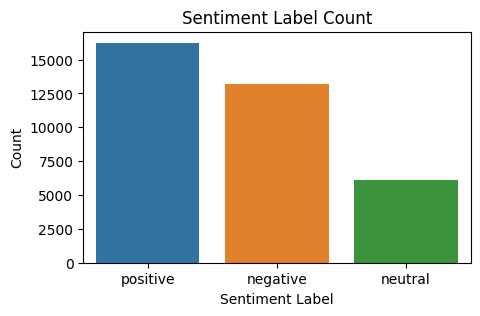

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='Description_Sentiment')
plt.title('Sentiment Label Count')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

In [15]:
def remove_punct(text):
    text=[x for x in text]
    tags=[x for x in string.punctuation]
    list1=[]
    for i in text:
        if i not in tags:
            list1.append(i)
    
    return ''.join(list1)

    

In [16]:
def remove_tags(text):
    tags = ['\n', '\'']
    for tag in tags:
        text = text.replace(tag, '')
    
    return text

In [17]:
from nltk.corpus import stopwords
nltk.download('stopwords')

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_words= ' '.join(filtered_words)
    return filtered_words



[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
from sklearn.model_selection import train_test_split


X = df['Description']
y = df['Description_Sentiment'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=212)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (32013,)
X_test shape: (3557,)
y_train shape: (32013,)
y_test shape: (3557,)


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Create a pipeline with TfidfVectorizer and LinearSVC
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', LinearSVC())
])


pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("accuracy score: {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

accuracy score: 81.53%
Confusion Matrix:
 [[1091   59  140]
 [ 131  343  148]
 [ 112   67 1466]]
Classification Report:
               precision    recall  f1-score   support

    negative       0.82      0.85      0.83      1290
     neutral       0.73      0.55      0.63       622
    positive       0.84      0.89      0.86      1645

    accuracy                           0.82      3557
   macro avg       0.79      0.76      0.77      3557
weighted avg       0.81      0.82      0.81      3557



In [1]:
pip install pandadoc

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
